In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

%matplotlib inline

In [2]:
# Helper function
def print_metrics(y_true, preds, model_name='', print_output=True):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 

    OUTPUT:
    None - prints the accuracy, precision, recall, and F1 score
    '''
    if print_output:
        print('{} Accuracy score :{}'.format(model_name, accuracy_score(y_true, preds)))
        print('{} Precision score: {}'.format(model_name, precision_score(y_true, preds)))
        print('{} Recall score: {}'.format(model_name, recall_score(y_true, preds)))
        print('{} F1 score: {}\n'.format(model_name, f1_score(y_true, preds)))

    return [accuracy_score(y_true, preds),
           precision_score(y_true, preds),
           recall_score(y_true, preds),
           f1_score(y_true, preds)]

In [3]:
# Read dataset
diabetes = pd.read_csv('data/data_classifiers_diabetes.csv')

# Visualize the first few rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


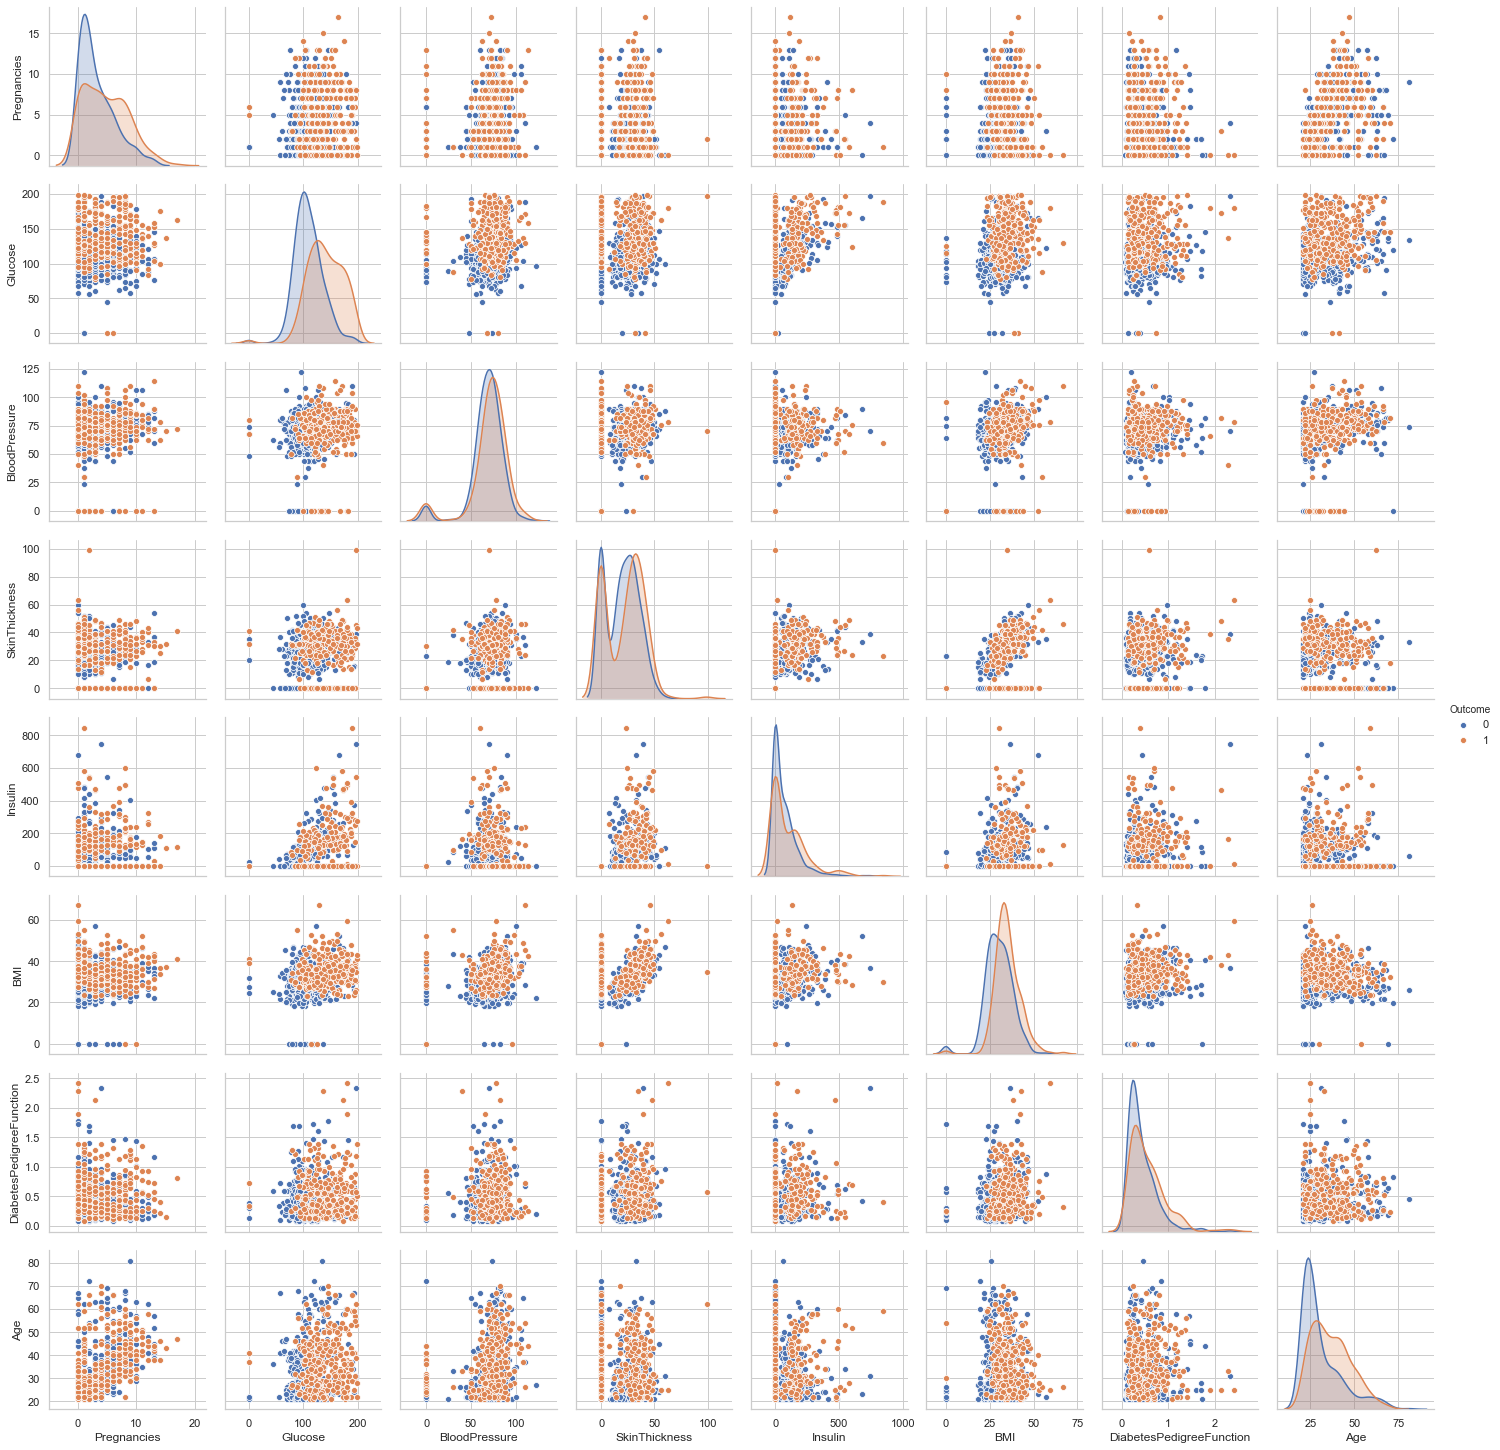

In [5]:
sns.set_style("whitegrid")
sns.pairplot(diabetes, hue="Outcome");

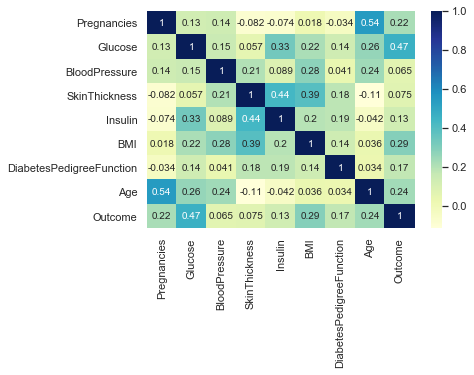

In [6]:
sns.heatmap(diabetes.corr(), annot=True, cmap="YlGnBu");

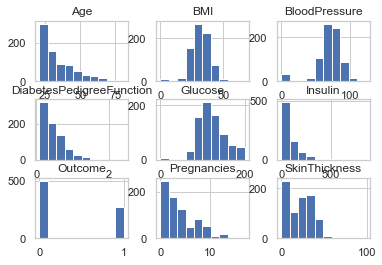

In [7]:
diabetes.hist();

In [8]:
y = diabetes.iloc [:, -1]
X = diabetes.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Navie Bayes

In [9]:
# Build a classifier for naive bayes
clf_nb = MultinomialNB()

# Set up the hyperparameter search
param_dist = {"alpha": list(np.linspace(0.1, 1, 10)) }

# Run a randomized search over the hyperparameters
nb_search = RandomizedSearchCV(clf_nb, param_distributions=param_dist)

# Fit the model
nb_search.fit(X_train, y_train)

# Make predictions on the test data
nb_preds = nb_search.best_estimator_.predict(X_test)

# Return your metrics on test data
met_nb = print_metrics(y_test, nb_preds, 'NB')
print(nb_search.best_params_)

NB Accuracy score :0.6623376623376623
NB Precision score: 0.5283018867924528
NB Recall score: 0.509090909090909
NB F1 score: 0.5185185185185185

{'alpha': 0.1}


# Support Vector Machine

In [10]:
# Build a classifier for support vector machines
clf_svm = SVC()

# Set up the hyperparameter search
## C recommend range 0-10, 
## kernels: rbf, linear
## degree: 3 (default)
## http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3, 5],
             "kernel": ['rbf','linear']}

# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svm, param_distributions=param_dist)

# Fit the model
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

# Return your metrics on test data
met_svm = print_metrics(y_test, svc_preds, 'svc')
print(svc_search.best_params_)

svc Accuracy score :0.7532467532467533
svc Precision score: 0.6545454545454545
svc Recall score: 0.6545454545454545
svc F1 score: 0.6545454545454545

{'kernel': 'linear', 'C': 0.1}


# Random Forest

In [11]:
# Build a classifier for random forest
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

met_rf = print_metrics(y_test, rf_preds, 'random forest')
print(random_search.best_params_)

random forest Accuracy score :0.7597402597402597
random forest Precision score: 0.6607142857142857
random forest Recall score: 0.6727272727272727
random forest F1 score: 0.6666666666666666

{'n_estimators': 174, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 2, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


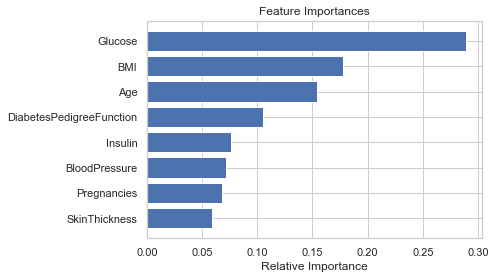

In [12]:
# Random Forest helpful plot from:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
features = diabetes.columns[:diabetes.shape[1]]
importances = random_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

# AdaBoost

In [13]:
# Build a classifier for AdaBoost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
             "learning_rate":[0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}

# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

# Return your metrics on test data
met_adabust = print_metrics(y_test, ada_preds, 'adaboost')
print(ada_search.best_params_)

adaboost Accuracy score :0.7532467532467533
adaboost Precision score: 0.6888888888888889
adaboost Recall score: 0.5636363636363636
adaboost F1 score: 0.6199999999999999

{'n_estimators': 100, 'learning_rate': 0.05}


# Bagging

In [14]:
# build a BaggingClassifier
clf_bag = BaggingClassifier()

# Set up the hyperparameter search
param_dist = {"base_estimator": [None],
              "n_estimators": [1, 5, 10, 50, 100, 150, 200],
              "max_samples": [1.0],
              "max_features": [1.0]}

# Run a randomized search over the hyperparameters
bag_search = RandomizedSearchCV(clf_bag, param_distributions=param_dist)

# Fit the model on the training data
bag_search.fit(X_train, y_train)

# Make predictions on the test data
bag_preds = bag_search.best_estimator_.predict(X_test)

# Return your metrics on test data
met_bagging = print_metrics(y_test, bag_preds, 'bagging')
print(bag_search.best_params_)

C:\Sergi\Programas\Anaconda3\envs\dl37\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


bagging Accuracy score :0.7402597402597403
bagging Precision score: 0.6271186440677966
bagging Recall score: 0.6727272727272727
bagging F1 score: 0.6491228070175439

{'n_estimators': 200, 'max_samples': 1.0, 'max_features': 1.0, 'base_estimator': None}


# Comparison

In [15]:
df = pd.DataFrame(data=np.asarray([met_nb, met_bagging, met_rf, met_adabust, met_svm]), 
                  index=['NB','bagging','rf','adabust','svm'], 
                  columns=['accuracy','precision','recall','f1'])
df

,accuracy,precision,recall,f1
NB,0.662338,0.528302,0.509091,0.518519
bagging,0.740260,0.627119,0.672727,0.649123
rf,0.759740,0.660714,0.672727,0.666667
adabust,0.753247,0.688889,0.563636,0.620000
svm,0.753247,0.654545,0.654545,0.654545
